In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [3]:
file_path = "data_tropicana_year105_gdp.csv"
df_gdp = pd.read_csv(file_path, delimiter=",")  

print(df_gdp.head())

   year        gdp
0     0  947610.99
1     1  931427.95
2     2  872704.64
3     3  875281.14
4     4  853371.77


In [4]:
file_path = "data_tropicana_year105.csv"
df = pd.read_csv(file_path, delimiter=",")  

print(df.head())

   year sex     profession   income  age
0     0   F  civil servant  5131.08   40
1     0   M          child     0.00    1
2     0   M     unemployed   124.10   25
3     0   M         farmer  1868.39   36
4     0   F          child     0.00    1


In [5]:
df = df.merge(df_gdp, on='year', how='left')

In [6]:
df['avg_income_per_profession'] = df.groupby(['year', 'profession'])['income'].transform('mean')



In [7]:

# Group by year and profession to get the count of each profession per year
profession_counts = df.groupby(['year', 'profession']).size().reset_index(name='profession_count')

# Get the total number of workers per year (sum of counts of all professions for each year)
total_workers_per_year = df.groupby('year').size().reset_index(name='total_workers')

# Merge the total workers per year into the profession_counts
profession_counts = profession_counts.merge(total_workers_per_year, on='year', how='left')

# Calculate the percentage of the workforce for each profession per year
profession_counts['percentage_of_workforce'] = (profession_counts['profession_count'] / profession_counts['total_workers']) * 100

# Merge this back into the original dataset
df = df.merge(profession_counts[['year', 'profession', 'percentage_of_workforce']], on=['year', 'profession'], how='left')

# Display the first few rows to see the result
print(df.head())

   year sex     profession   income  age        gdp  \
0     0   F  civil servant  5131.08   40  947610.99   
1     0   M          child     0.00    1  947610.99   
2     0   M     unemployed   124.10   25  947610.99   
3     0   M         farmer  1868.39   36  947610.99   
4     0   F          child     0.00    1  947610.99   

   avg_income_per_profession  percentage_of_workforce  
0                5357.960465                      8.6  
1                   0.000000                     24.8  
2                 193.519318                      8.8  
3                2182.726575                     14.6  
4                   0.000000                     24.8  


In [8]:
import numpy as np
import pandas as pd

# Gender Distribution Calculation
gender_distribution = df.groupby(['year', 'sex']).size().unstack(fill_value=0)
gender_distribution['total'] = gender_distribution.sum(axis=1)
gender_distribution['female_percentage'] = gender_distribution['F'] / gender_distribution['total']

# Employment Rate Calculation
non_employed_professions = ['child', 'unemployed', 'homemaker', 'retired']
df['employed'] = ~df['profession'].isin(non_employed_professions)
employment_rate = df.groupby('year')['employed'].mean()  # Convert to percentage

# Gini Coefficient Calculation
def gini_coefficient(income_list):
    """Computes the Gini coefficient of a list of incomes."""
    incomes = np.sort(income_list)  # Sort incomes in ascending order
    n = len(incomes)
    if n == 0:
        return np.nan  # Avoid division by zero
    cumulative_income_sum = np.sum((np.arange(1, n + 1) * incomes))
    total_income_sum = np.sum(incomes)
    
    gini = (2 * cumulative_income_sum) / (n * total_income_sum) - (n + 1) / n
    return gini

gini = df.groupby('year')['income'].apply(gini_coefficient)







In [9]:
df = df.merge(gini, on='year', how='left')
df = df.merge(gender_distribution, on='year', how='left')
df = df.merge(employment_rate, on='year', how='left')





In [10]:
#  Add column for average age per year
average_age_per_year = df.groupby('year')['age'].mean().reset_index(name='average_age')

# Merge average age per year into the original dataframe
df = df.merge(average_age_per_year, on='year', how='left')


In [11]:
df.head()

,year,sex,profession,income_x,age,gdp,avg_income_per_profession,percentage_of_workforce,employed_x,income_y,F,M,X,total,female_percentage,employed_y,average_age
0,0,F,civil servant,5131.08,40,947610.99,5357.960465,8.6,True,0.604055,234,244,22,500,0.468,0.516,33.516
1,0,M,child,0.00,1,947610.99,0.000000,24.8,False,0.604055,234,244,22,500,0.468,0.516,33.516
2,0,M,unemployed,124.10,25,947610.99,193.519318,8.8,False,0.604055,234,244,22,500,0.468,0.516,33.516
3,0,M,farmer,1868.39,36,947610.99,2182.726575,14.6,True,0.604055,234,244,22,500,0.468,0.516,33.516
4,0,F,child,0.00,1,947610.99,0.000000,24.8,False,0.604055,234,244,22,500,0.468,0.516,33.516


In [12]:
df = df.drop(columns=['employed_x', 'F', 'M','X','total'])
df.head()


,year,sex,profession,income_x,age,gdp,avg_income_per_profession,percentage_of_workforce,income_y,female_percentage,employed_y,average_age
0,0,F,civil servant,5131.08,40,947610.99,5357.960465,8.6,0.604055,0.468,0.516,33.516
1,0,M,child,0.00,1,947610.99,0.000000,24.8,0.604055,0.468,0.516,33.516
2,0,M,unemployed,124.10,25,947610.99,193.519318,8.8,0.604055,0.468,0.516,33.516
3,0,M,farmer,1868.39,36,947610.99,2182.726575,14.6,0.604055,0.468,0.516,33.516
4,0,F,child,0.00,1,947610.99,0.000000,24.8,0.604055,0.468,0.516,33.516


In [13]:
df.rename(columns={'income_x': 'income', 'income_y': 'gini', 'employed_y': 'employment rate'}, inplace=True)


In [14]:
df.head()

,year,sex,profession,income,age,gdp,avg_income_per_profession,percentage_of_workforce,gini,female_percentage,employment rate,average_age
0,0,F,civil servant,5131.08,40,947610.99,5357.960465,8.6,0.604055,0.468,0.516,33.516
1,0,M,child,0.00,1,947610.99,0.000000,24.8,0.604055,0.468,0.516,33.516
2,0,M,unemployed,124.10,25,947610.99,193.519318,8.8,0.604055,0.468,0.516,33.516
3,0,M,farmer,1868.39,36,947610.99,2182.726575,14.6,0.604055,0.468,0.516,33.516
4,0,F,child,0.00,1,947610.99,0.000000,24.8,0.604055,0.468,0.516,33.516


In [15]:
df.to_csv('day_2.csv')

In [16]:
df.head()

,year,sex,profession,income,age,gdp,avg_income_per_profession,percentage_of_workforce,gini,female_percentage,employment rate,average_age
0,0,F,civil servant,5131.08,40,947610.99,5357.960465,8.6,0.604055,0.468,0.516,33.516
1,0,M,child,0.00,1,947610.99,0.000000,24.8,0.604055,0.468,0.516,33.516
2,0,M,unemployed,124.10,25,947610.99,193.519318,8.8,0.604055,0.468,0.516,33.516
3,0,M,farmer,1868.39,36,947610.99,2182.726575,14.6,0.604055,0.468,0.516,33.516
4,0,F,child,0.00,1,947610.99,0.000000,24.8,0.604055,0.468,0.516,33.516


In [19]:
df_small = df
df_small = df.drop(columns=['sex', 'profession', 'income','avg_income_per_profession','age','percentage_of_workforce' ])
df_small.head()


,year,gdp,gini,female_percentage,employment rate,average_age
0,0,947610.99,0.604055,0.468,0.516,33.516
1,0,947610.99,0.604055,0.468,0.516,33.516
2,0,947610.99,0.604055,0.468,0.516,33.516
3,0,947610.99,0.604055,0.468,0.516,33.516
4,0,947610.99,0.604055,0.468,0.516,33.516


   year  gini  employment rate  average_age  predicted gdp
0   110  0.66             0.48           36   1.041365e+06
1   111  0.67             0.46           36   1.025310e+06
2   112  0.68             0.50           37   1.183827e+06
3   113  0.69             0.51           37   1.183890e+06
4   114  0.70             0.52           39   1.170060e+06


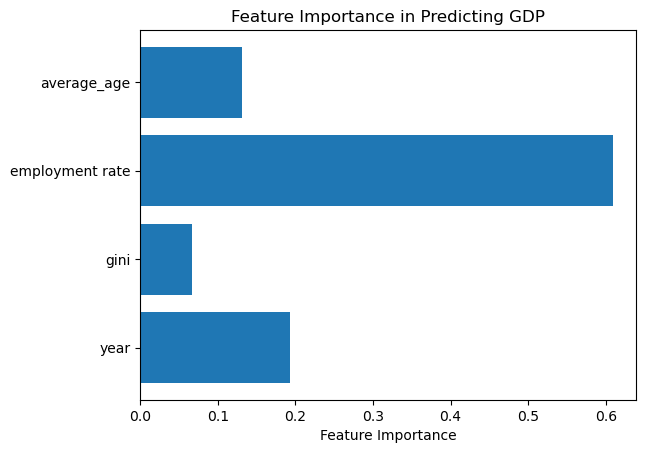

In [25]:

# Selecting features (X) and target (y)
X = df_small[['year', 'gini', 'employment rate', 'average_age']]
y = df_small['gdp']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model: Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Forecasting the next 5 years
future_years = [max(df['year']) + i for i in range(5, 10)]
future_data = pd.DataFrame({
    'year': future_years,
    'gini': [0.66,
0.67,
0.68,
0.69,
0.7],  
    'employment rate': [0.48,
0.46,
0.50,
0.51,
0.52],
    'average_age': [36,
36,
37,
37,
39]  
})

# Predict GDP for future years
future_gdp_predictions = model.predict(future_data)

# Display results
future_data['predicted gdp'] = future_gdp_predictions
print(future_data)

# Feature Importance to see which factors contribute most to GDP prediction
feature_importances = model.feature_importances_
feature_names = X.columns

# Plotting feature importance
plt.barh(feature_names, feature_importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Predicting GDP")
plt.show()


In [18]:

# Get the last 5 years of data
last_5_years = df['year'].max() - 4
filtered_df = df[df['year'] >= last_5_years]

# Calculate income per profession for the last 5 years
income_per_profession = filtered_df.groupby(['year', 'profession'])['income'].mean().reset_index()

# Calculate percentage of workforce per profession for the last 5 years
workforce_per_profession = filtered_df.groupby(['year', 'profession'])['percentage_of_workforce'].mean().reset_index()

# Get GDP, Gini, employment rate, and average age for the last 5 years
economic_indicators = filtered_df.groupby('year').agg({
    'gdp': 'mean',
    'gini': 'mean',
    'employment rate': 'mean',
    'average_age': 'mean'
}).reset_index()

# Display results
print("Income per profession for the last 5 years:")
print(income_per_profession)

print("\nPercentage of workforce per profession for the last 5 years:")
print(workforce_per_profession)

print("\nEconomic indicators for the last 5 years:")
print(economic_indicators)


Income per profession for the last 5 years:
    year        profession       income
0    101             child     0.000000
1    101     civil servant  6628.675000
2    101         craftsman  5411.434340
3    101            farmer  2508.689219
4    101            fisher  2357.466721
5    101         homemaker  -172.662857
6    101           retired  1625.109057
7    101  service provider  6378.896857
8    101        unemployed  -128.510000
9    102             child     0.000000
10   102     civil servant  6773.294333
11   102         craftsman  5337.708800
12   102            farmer  1798.841311
13   102            fisher  2257.613770
14   102         homemaker  -162.831020
15   102           retired  1674.433793
16   102  service provider  6339.812857
17   102        unemployed  -131.121923
18   103             child     0.000000
19   103     civil servant  6949.535862
20   103         craftsman  5175.796078
21   103            farmer  1777.447288
22   103            fisher  2189.965